In [ ]:
import pandas as pd
import nltk
import string
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_clothing.csv")
data_c = data.copy()
data_c

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
data_c.dropna(inplace=True)
data_c.reset_index(drop=True, inplace=True)
data_c

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
19657,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
19658,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
19659,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
19660,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
punc = set(string.punctuation)

stop_words = set(nltk.corpus.stopwords.words('english'))
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

abbreviation = ["'m", "'ll", "'ve", "'s", "'re", "'d", "\'", "n't", "can't", "won't"]
normal = [" am", " will", " have", " is", " are", " had", "'", " not", "can not", "will not"]

In [ ]:
for i in range(len(data_c)):
    for j in range(len(abbreviation)):
        data_c.loc[i, 'Review Text'] = data_c.loc[i, 'Review Text'].replace(abbreviation[j], normal[j])

In [ ]:
def top_words(df, column, nb_top):
    count_keyword = dict()
    for index, col in df[column].iteritems():
        if isinstance(col, float):
            continue
        for word in col.split(','):
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]

In [ ]:
def plot_world_cloud(df,
                     column,
                     nb_top):
    fig = plt.figure(1, figsize=(18, 12))
    ax1 = fig.add_subplot(1, 1, 1)

    words = dict()
    trunc_occurences = top_words(df, column, nb_top)
    for s in trunc_occurences:
        words[s[0]] = s[1]

    word_cloud = WordCloud(width=1000,
                           height=600,
                           normalize_plurals=False,
                           background_color='#424342',
                           colormap='Set3',
                           random_state=4
                           # mask=mask
                           )
    word_cloud.generate_from_frequencies(words)
    ax1.imshow(word_cloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title("Word Cloud for the column {} (top {}) \n".format(
        column, nb_top))
    plt.show()

before clearing data

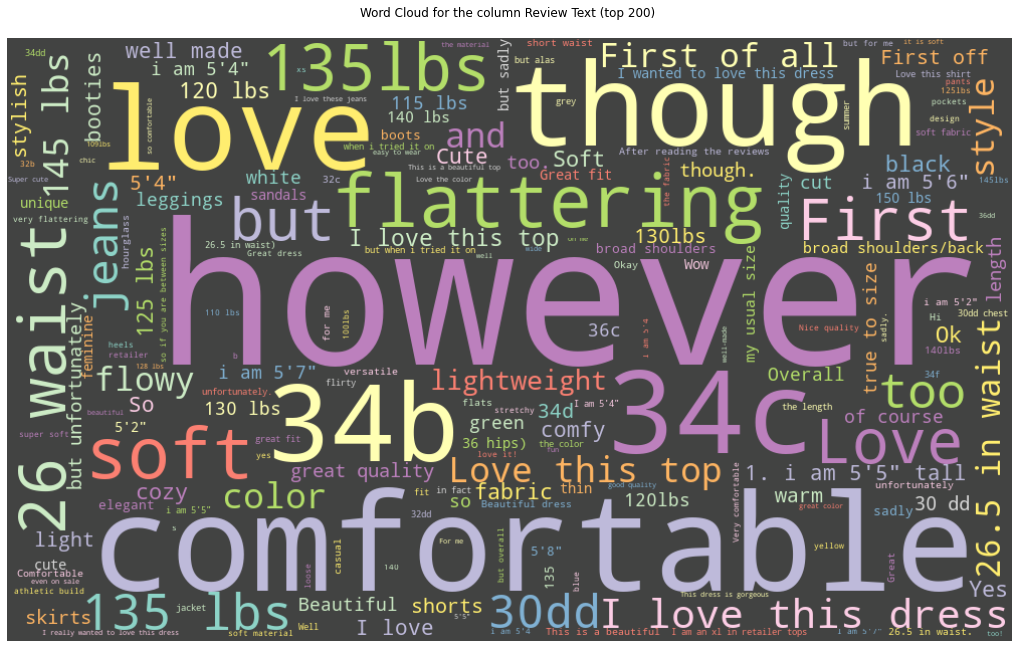

In [ ]:
plot_world_cloud(df=data_c, column='Review Text', nb_top=200)

In [ ]:
dress = pd.read_csv("/content/drive/MyDrive/dresses.csv")
bottom = pd.read_csv("/content/drive/MyDrive/bottoms.csv")
top = pd.read_csv("/content/drive/MyDrive/tops.csv")
trend = pd.read_csv("/content/drive/MyDrive/trend.csv")
jacket = pd.read_csv("/content/drive/MyDrive/jackets.csv")
intimate = pd.read_csv("/content/drive/MyDrive/intimate.csv")

In [ ]:
plot_world_cloud(df=dress, column='Review Text', nb_top=200)
plot_world_cloud(df=bottom, column='Review Text', nb_top=200)
plot_world_cloud(df=top, column='Review Text', nb_top=200)
plot_world_cloud(df=jacket, column='Review Text', nb_top=200)
plot_world_cloud(df=intimate, column='Review Text', nb_top=200)
plot_world_cloud(df=trend, column='Review Text', nb_top=10)

Text Preprocessing

In [ ]:
def word_by_word(comment):
    list_word = []
    word = ""
    for c in range(len(comment)):
        if comment[c] != " " and comment[c] not in punc:
            if comment[c] not in number:
                word = word + str(comment[c])
            else:
                word = ""
                c += 1
        else:
            if word != "" and len(word) >= 3:
                list_word.append(word.lower())
            word = ""
            c += 1

    if len(list_word) == 0:
        list_word.append("")

    return list_word


In [ ]:
def title_comment(k, m):
    for j_0 in range(len(k)):
        if k[j_0] != "":
            m.insert(0, k[j_0])
    return m

In [ ]:
title_review = []
for i in range(len(data_c)):
    m_1 = word_by_word(data_c['Title'][i])
    m_2 = word_by_word(data_c['Review Text'][i])
    title_review.append(title_comment(m_1, m_2))
data_c['title_review'] = title_review


In [ ]:
tokenized_review = []
for i in range(len(data_c)):
    m_1 = [w for w in word_by_word(data_c['Title'][i]) if w.lower() not in stop_words]
    m_2 = [w for w in word_by_word(data_c['Review Text'][i]) if w.lower() not in stop_words]
    tokenized_review.append(title_comment(m_1, m_2))

data_c['tokenized_review'] = tokenized_review

In [ ]:
def list_to_string(list_e):
    s = ''
    for w in list_e:
        s += str(', ') + str(w)

    return s

In [ ]:
data_c['Tokenized_Review_str'] = data_c.apply(lambda row: list_to_string(row['tokenized_review']), axis=1)

In [ ]:
stemmer = nltk.stem.LancasterStemmer()
lemmatizer = nltk.wordnet.WordNetLemmatizer()

In [ ]:
data_c['stemmed_clean_tokenized'] = data_c.apply(lambda row: [stemmer.stem(w) for w in row['tokenized_review']], axis=1)


In [ ]:
data_c['Stemmed_Review_str'] = data_c.apply(lambda row: list_to_string(row['stemmed_clean_tokenized']), axis=1)

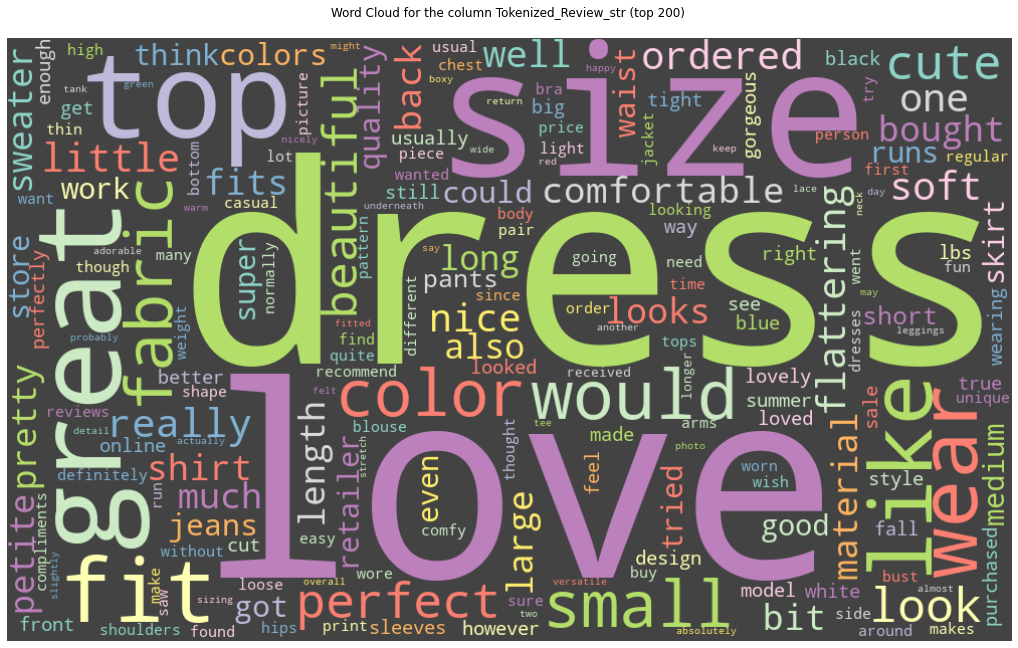

In [ ]:
plot_world_cloud(df=data_c, column='Tokenized_Review_str', nb_top=200)

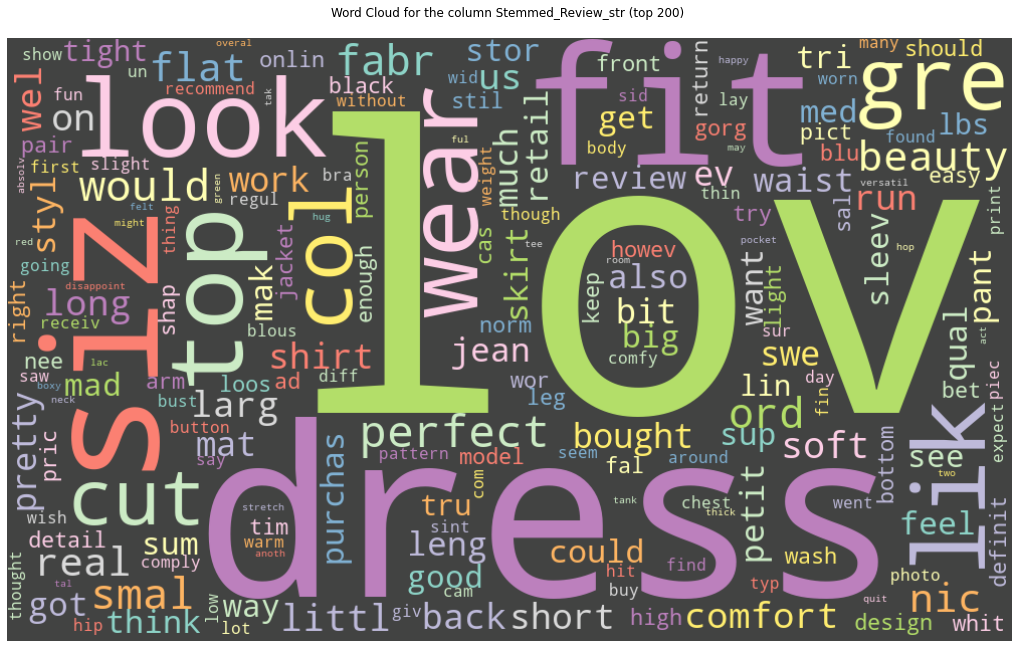

In [ ]:
plot_world_cloud(df=data_c, column='Stemmed_Review_str', nb_top=200)

In [63]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [61]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [69]:
data_c['lemmatisation'] = data_c.apply(lambda row : [lemmatizer.lemmatize(w) for w in row['tokenized_review']], axis = 1)

In [70]:
data_c['Lemmatisation_Review_str'] = data_c.apply(lambda row: list_to_string(row['lemmatisation']), axis=1)

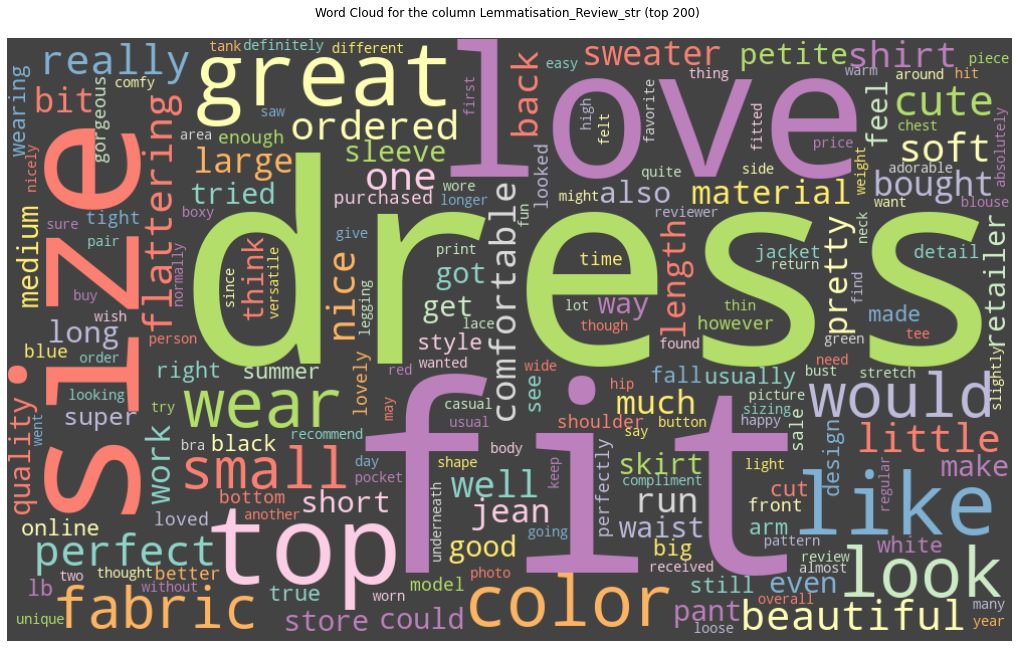

In [71]:
plot_world_cloud(df=data_c, column='Lemmatisation_Review_str', nb_top=200)

In [72]:
new_data = data_c.copy()
new_data.to_csv('data_new.csv')